In [1]:
import numpy as np
import pandas as pd

In [2]:
d1 = pd.read_csv("China\Shanghai SE Index Data.csv")
d2 = pd.read_csv("Germany\DAX Index Data.csv")
d3 = pd.read_csv("UK\FTSE 100 Index Data.csv")
d4 = pd.read_csv(r"Japan\NIKKEI 225 Index Data.csv")
d5 = pd.read_csv(r"US\NYSE Composite.csv")
d6 = pd.read_csv(r"India\Nifty 50 Index Data.csv")

FileNotFoundError: [Errno 2] File b'Japan\\NIKKEI 225 Index Data.csv' does not exist: b'Japan\\NIKKEI 225 Index Data.csv'

In [3]:
d1.drop(['Volume','Open','High','Low','Adj Close'], axis=1,inplace =True)
d2.drop(['Volume','Open','High','Low','Adj Close'], axis=1,inplace =True)
d3.drop(['Volume','Open','High','Low','Adj Close'], axis=1,inplace =True)
d4.drop(['Volume','Open','High','Low','Adj Close'], axis=1,inplace =True)
d5.drop(['Volume','Open','High','Low','Adj Close'], axis=1,inplace =True)
d6.drop(['Volume','Open','High','Low','Adj Close'], axis=1,inplace =True)

In [4]:
d3.loc[110]

Date    11-06-2015
FTSE        6846.7
Name: 110, dtype: object

In [5]:
dk = d1.merge(d2,'inner',on='Date')

In [6]:
dk = dk.merge(d3,on='Date')

In [7]:
dk = dk.merge(d4,on='Date')

In [8]:
dk = dk.merge(d5,on='Date')

In [9]:
dk = dk.merge(d6,on='Date')

In [10]:
dk.to_csv("Cross Country Index Data.csv")

# Data Visualization

In [5]:
df = pd.read_csv("multi_country.csv")

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df.head()

,Date,BSE,NYSE,N225,DAX,SS.Shanghai
0,6/25/2009,14345.62012,5911.029785,9796.080078,4800.560059,2925.045898
1,6/26/2009,14764.63965,5906.959961,9877.389648,4776.470215,2928.210938
2,6/29/2009,14785.74023,5962.500000,9783.469727,4885.089844,2975.313965
3,6/30/2009,14493.83984,5905.149902,9958.440430,4808.640137,2959.362061
4,7/1/2009,14645.46973,5954.009766,9939.929688,4905.439941,3008.149902


In [8]:
df.shape

(2114, 6)

In [9]:
df.loc[0:,'BSE':'SS.Shanghai'] = (np.log(df.loc[0:,'BSE':'SS.Shanghai']).diff(1))*100

# log first difference

In [10]:
df.dropna(inplace=True)
df.head()

,Date,BSE,NYSE,N225,DAX,SS.Shanghai
1,6/26/2009,2.879043,-0.068875,0.826596,-0.503077,0.108146
2,6/29/2009,0.142811,0.935855,-0.955407,2.248585,1.595793
3,6/30/2009,-1.993950,-0.966502,1.772628,-1.577335,-0.537584
4,7/1/2009,1.040733,0.824007,-0.186053,1.993045,1.635151
5,7/2/2009,0.088865,-3.048505,-0.643715,-3.885590,1.717265


In [11]:
df.to_csv('Return multi country.csv')

In [12]:
df  = pd.read_csv('Return multi country.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

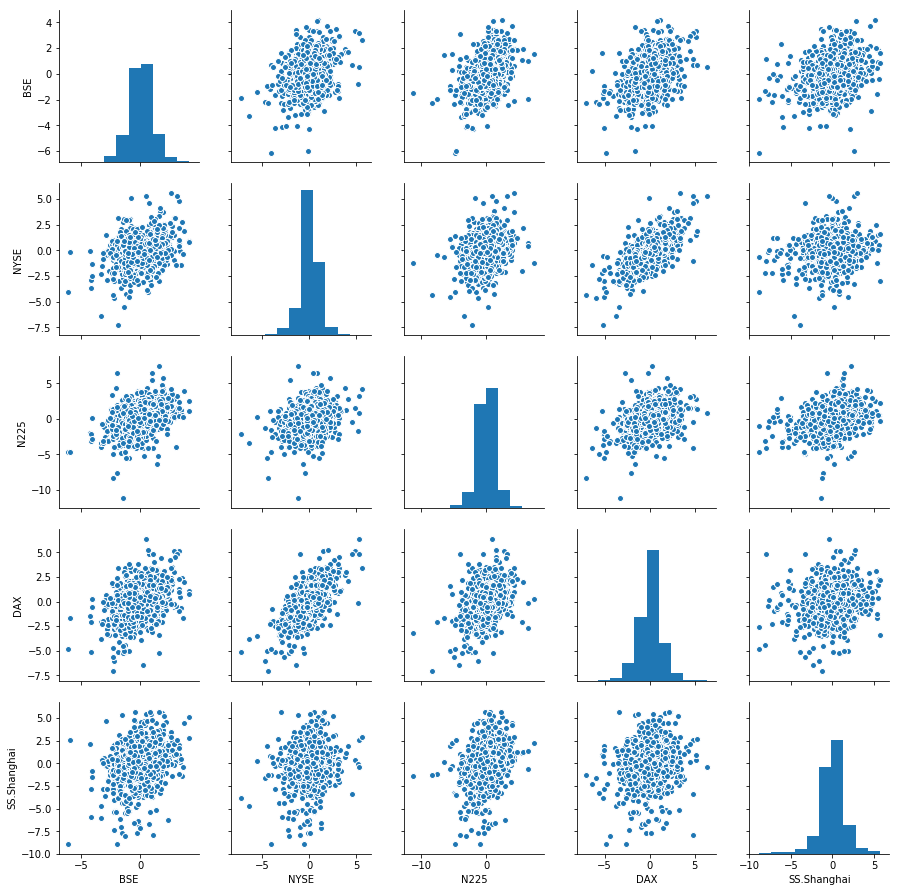

In [13]:
sns.pairplot(df)

In [14]:
df.corr()

,BSE,NYSE,N225,DAX,SS.Shanghai
BSE,1.000000,0.329159,0.351042,0.403581,0.260760
NYSE,0.329159,1.000000,0.242720,0.671000,0.170657
N225,0.351042,0.242720,1.000000,0.320469,0.287899
DAX,0.403581,0.671000,0.320469,1.000000,0.173548
SS.Shanghai,0.260760,0.170657,0.287899,0.173548,1.000000


In [15]:
print(df.head(),'\n')
print(df.corr())

        Date       BSE      NYSE      N225       DAX  SS.Shanghai
0  6/26/2009  2.879043 -0.068875  0.826596 -0.503077     0.108146
1  6/29/2009  0.142811  0.935855 -0.955407  2.248585     1.595793
2  6/30/2009 -1.993950 -0.966502  1.772628 -1.577335    -0.537584
3   7/1/2009  1.040733  0.824007 -0.186053  1.993045     1.635151
4   7/2/2009  0.088865 -3.048505 -0.643715 -3.885590     1.717265 

                  BSE      NYSE      N225       DAX  SS.Shanghai
BSE          1.000000  0.329159  0.351042  0.403581     0.260760
NYSE         0.329159  1.000000  0.242720  0.671000     0.170657
N225         0.351042  0.242720  1.000000  0.320469     0.287899
DAX          0.403581  0.671000  0.320469  1.000000     0.173548
SS.Shanghai  0.260760  0.170657  0.287899  0.173548     1.000000


# Dynamic Factor Model

In [16]:
import statsmodels.api as sm

In [17]:
endog= df.loc[0:,'BSE':'SS.Shanghai']

In [18]:
dfm = sm.tsa.DynamicFactor(endog,k_factors=1,factor_order=2,error_order=2)

In [19]:
r1 = dfm.fit(method = 'powell',cov_type='opg',disp=False)
dy_fit = dfm.fit(r1.params,cov_type='robust',disp=False)

In [20]:
print(dy_fit.summary(alpha =0.05, separate_params=False))

                                         Statespace Model Results                                        
Dep. Variable:     ['BSE', 'NYSE', 'N225', 'DAX', 'SS.Shanghai']   No. Observations:                 2068
Model:                         DynamicFactor(factors=1, order=2)   Log Likelihood              -15912.368
                                                  + AR(2) errors   AIC                          31868.736
Date:                                           Sat, 20 Jul 2019   BIC                          31992.691
Time:                                                   17:46:47   HQIC                         31914.173
Sample:                                                        0                                         
                                                          - 2068                                         
Covariance Type:                                          robust                                         
                                       coef   

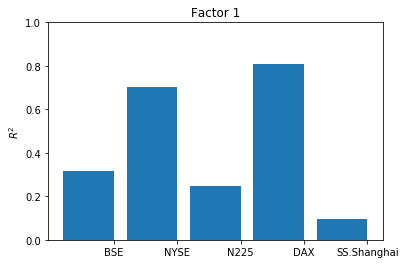

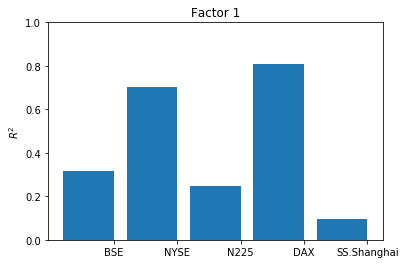

In [21]:
dy_fit.plot_coefficients_of_determination()

In [22]:
dy_fit.cov_params_default

,loading.f1.BSE,loading.f1.NYSE,loading.f1.N225,loading.f1.DAX,loading.f1.SS.Shanghai,sigma2.BSE,sigma2.NYSE,sigma2.N225,sigma2.DAX,sigma2.SS.Shanghai,...,L1.e(BSE).e(BSE),L2.e(BSE).e(BSE),L1.e(NYSE).e(NYSE),L2.e(NYSE).e(NYSE),L1.e(N225).e(N225),L2.e(N225).e(N225),L1.e(DAX).e(DAX),L2.e(DAX).e(DAX),L1.e(SS.Shanghai).e(SS.Shanghai),L2.e(SS.Shanghai).e(SS.Shanghai)
loading.f1.BSE,0.000879,0.000362,0.000394,0.000265,6.200974e-04,0.000053,-5.822155e-06,-6.237596e-05,-0.000154,-0.000482,...,1.191553e-04,0.000009,-0.000030,0.000023,-2.239244e-05,-0.000012,-0.000066,5.296378e-05,-0.000045,-6.726661e-05
loading.f1.NYSE,0.000362,0.001177,0.000341,0.000680,3.309055e-04,-0.000078,1.761228e-04,-5.772871e-05,-0.000557,-0.000528,...,-8.587885e-06,0.000028,0.000150,0.000134,3.314174e-05,0.000029,-0.000373,-2.080661e-05,-0.000079,-5.467132e-05
loading.f1.N225,0.000394,0.000341,0.001564,0.000521,5.387643e-04,-0.000092,-1.533644e-04,-7.172123e-04,-0.000101,-0.000468,...,2.033027e-05,0.000013,-0.000181,-0.000188,-3.052869e-04,-0.000218,0.000021,4.903701e-05,-0.000048,-2.585709e-05
loading.f1.DAX,0.000265,0.000680,0.000521,0.001609,1.597750e-04,-0.000116,-4.803869e-04,-4.391425e-04,0.000700,0.000038,...,-7.626472e-05,0.000017,-0.000076,-0.000182,-9.421608e-05,-0.000031,0.000103,3.881455e-05,0.000122,4.160333e-05
loading.f1.SS.Shanghai,0.000620,0.000331,0.000539,0.000160,2.497722e-03,-0.000022,-3.503384e-05,3.167176e-05,-0.000113,-0.000766,...,4.209233e-05,-0.000010,-0.000075,0.000028,3.190085e-07,-0.000006,-0.000086,2.133591e-04,-0.000091,-3.829656e-05
sigma2.BSE,0.000053,-0.000078,-0.000092,-0.000116,-2.247310e-05,0.001397,5.913914e-05,3.124750e-04,0.000048,0.000408,...,-6.282190e-05,-0.000084,-0.000102,-0.000054,1.897648e-05,0.000005,-0.000019,-6.002576e-06,0.000039,2.119547e-05
sigma2.NYSE,-0.000006,0.000176,-0.000153,-0.000480,-3.503384e-05,0.000059,1.054494e-03,3.340988e-04,-0.000939,-0.000263,...,-4.576863e-07,0.000042,0.000217,0.000311,6.008146e-05,0.000011,-0.000493,-1.249066e-04,-0.000084,-6.830267e-05
sigma2.N225,-0.000062,-0.000058,-0.000717,-0.000439,3.167176e-05,0.000312,3.340988e-04,8.423276e-03,0.000133,0.000403,...,5.992431e-07,-0.000049,-0.000116,0.000045,1.190422e-03,0.000311,-0.000432,-2.287034e-04,0.000154,7.568779e-05
sigma2.DAX,-0.000154,-0.000557,-0.000101,0.000700,-1.132598e-04,0.000048,-9.387842e-04,1.330881e-04,0.002884,0.001569,...,-6.099764e-05,-0.000030,-0.000512,-0.000567,-6.760294e-05,-0.000017,0.000937,3.431459e-04,0.000397,2.075298e-04
sigma2.SS.Shanghai,-0.000482,-0.000528,-0.000468,0.000038,-7.661300e-04,0.000408,-2.627770e-04,4.028714e-04,0.001569,0.015310,...,-5.543044e-05,0.000017,-0.000348,-0.000203,-7.640501e-06,0.000223,0.000162,9.763605e-05,0.000460,-1.668772e-04


In [23]:
d = pd.DataFrame(dy_fit.fittedvalues, columns=df.columns[1:6])

In [24]:
np.max(d)

BSE            0.576109
NYSE           1.023703
N225           1.801345
DAX            1.034328
SS.Shanghai    0.484111
dtype: float64

In [25]:
d.drop(0,axis=0,inplace=True)

d.head()

,BSE,NYSE,N225,DAX,SS.Shanghai
1,-0.017400,0.144070,-0.101233,0.223397,0.022127
2,0.018385,0.156515,0.480594,0.010359,0.086725
3,-0.103268,-0.125982,-0.636632,-0.228084,-0.155282
4,0.210422,0.287996,0.318073,0.164632,0.129614
5,-0.350826,0.028996,-0.566664,-0.342187,-0.303373


In [26]:
print(d.corr(),'\n')
print(df.corr())

                  BSE      NYSE      N225       DAX  SS.Shanghai
BSE          1.000000  0.245187  0.456239  0.672423     0.832056
NYSE         0.245187  1.000000 -0.146382 -0.135531     0.282922
N225         0.456239 -0.146382  1.000000  0.188178     0.384169
DAX          0.672423 -0.135531  0.188178  1.000000     0.627533
SS.Shanghai  0.832056  0.282922  0.384169  0.627533     1.000000 

                  BSE      NYSE      N225       DAX  SS.Shanghai
BSE          1.000000  0.329159  0.351042  0.403581     0.260760
NYSE         0.329159  1.000000  0.242720  0.671000     0.170657
N225         0.351042  0.242720  1.000000  0.320469     0.287899
DAX          0.403581  0.671000  0.320469  1.000000     0.173548
SS.Shanghai  0.260760  0.170657  0.287899  0.173548     1.000000


In [27]:
d.to_csv('DFM Fitted values.csv')

In [28]:
d = pd.read_csv('DFM Fitted Values.csv')
d.drop('Unnamed: 0',axis=1,inplace=True)
d.shape

(2067, 5)

# ML Models

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression(normalize=True)

In [31]:
X = d.drop(['BSE'],axis=1)
y= d['BSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [32]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [33]:
predict1 = lr.predict(X_test)
from sklearn import metrics

In [34]:
(np.sqrt(metrics.mean_squared_error(y_test,predict1)))

0.05408925582422604

In [141]:
error1 =[]; j=0;ee=0;u1=0
for i in y_test.index:
    if(y_test[i] != 0):
        ee = ((y_test[i]-predict1[j])/y_test[i])*100
        if(-500<ee<500):
            error1.append(ee)
        else: u1 = u1 +1
    
    j=j+1

print(u1)

49


In [142]:
error1

[-58.17675087993298,
 403.08746878727675,
 -64.05648184351882,
 -420.687463587707,
 -85.79138845961262,
 219.94088343538417,
 212.5902572554028,
 -245.59353260062605,
 -344.28307639046415,
 36.30682866410587,
 91.96680218981031,
 34.649374256089715,
 -25.545613251385202,
 124.53319867650472,
 156.0325561696653,
 47.66627506244769,
 18.353543077343833,
 23.753881989787814,
 58.27462946905384,
 -315.53099684643945,
 -34.70581404303867,
 10.344455456805512,
 -137.88125456137456,
 34.09226112761584,
 10.832695312987939,
 12.96586318661263,
 -83.29899066506526,
 16.139656457377846,
 185.76423931659113,
 92.12398635302725,
 -263.8077632418648,
 0.5101954454460893,
 26.596440557091842,
 26.376869083765754,
 36.50604103641997,
 -4.6543212712117095,
 11.441862272970225,
 -89.37131414709276,
 -11.895510722407211,
 15.41600093046777,
 -21.931087823783056,
 -190.34027812493437,
 28.082103292727993,
 122.78956598386448,
 107.76546878265512,
 -43.607191153502086,
 -18.544756009714053,
 -89.239514314

In [143]:
y_test.index

Int64Index([1517, 1618, 1399, 1631, 1227,  976,  510,  122,  100,  489,
            ...
            1381, 1128,  462,  816, 1001,   23,  665, 1866, 1572,  664],
           dtype='int64', length=827)

In [144]:
print(np.mean(error1),'\n')

20.145770297085903 



In [145]:
np.shape(y_test)

(827,)

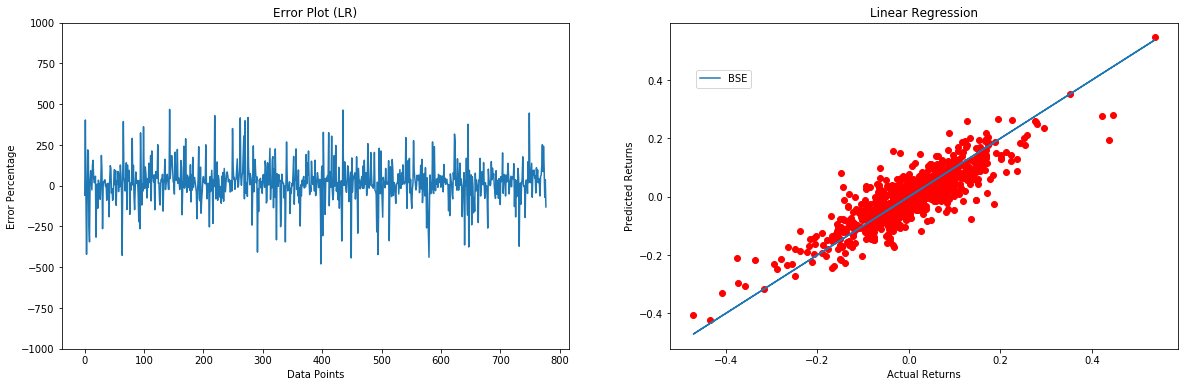

In [146]:
fig1, axes = plt.subplots(1,2,figsize =(20,6))

axes[0].plot(range(0,len(error1)),error1)
axes[1].plot(y_test,predict1,'ro')
axes[1].plot(y_test,y_test)

axes[0].set_ylim(-1000,1000)
axes[0].set_ylabel('Error Percentage')
axes[0].set_xlabel('Data Points')
axes[0].set_title('Error Plot (LR)')

axes[1].set_xlabel('Actual Returns')
axes[1].set_ylabel('Predicted Returns')
axes[1].set_title('Linear Regression')
axes[1].legend(loc = (0.05,0.8))

In [147]:
from sklearn.neighbors import KNeighborsRegressor

In [148]:
rmse=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,pred)))

Text(0.5, 1.0, 'KNN')

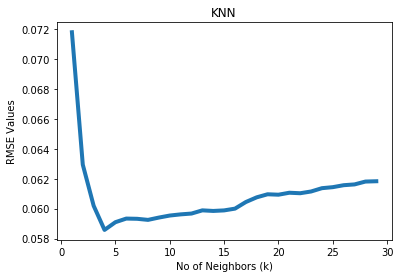

In [149]:
plt.plot(range(1,30), rmse, linewidth = 4)
plt.xlabel("No of Neighbors (k)")
plt.ylabel("RMSE Values")
plt.title("KNN")

In [150]:
np.min(rmse)

0.05857448417817378

In [151]:
d.shape

(2067, 5)

In [152]:
knn = KNeighborsRegressor(n_neighbors=20)

In [153]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [154]:
predict2 = knn.predict(X_test)

In [155]:
error2 =[]; j=0;err=[];u2=0
for i in y_test.index:
    if(y_test[i] != 0):
        err =((y_test[i]-predict2[j])/y_test[i])*100
        if(-500<err<500):
            error2.append(err)
        else: u2 = u2 +1
    
    j=j+1

print(u2)

44


In [156]:
print(np.mean(error2))

40.13668410045859


In [157]:
(np.sqrt(metrics.mean_squared_error(y_test,predict2)))

0.06092853579768795

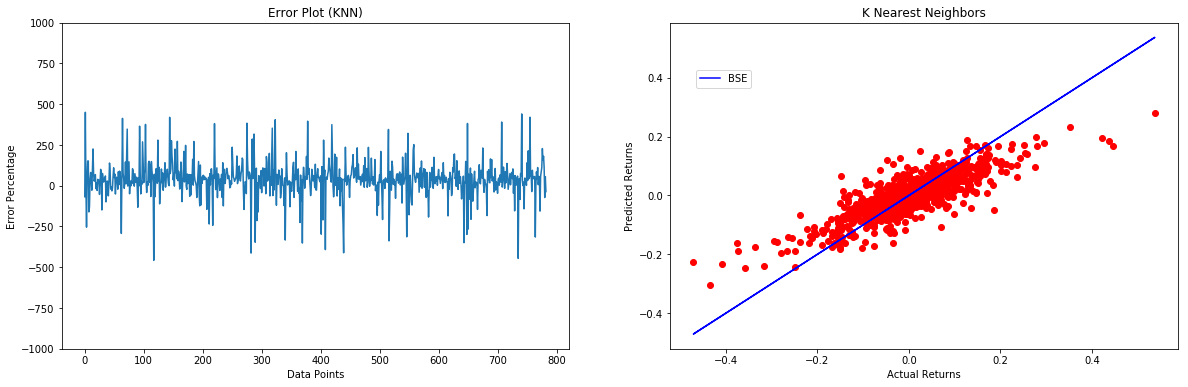

In [158]:
fig2, axes = plt.subplots(1,2,figsize =(20,6))

axes[0].plot(range(0,len(error2)),error2)
axes[1].plot(y_test,predict2,'ro')
axes[1].plot(y_test,y_test,'b')

axes[0].set_ylim(-1000,1000)
axes[0].set_ylabel('Error Percentage')
axes[0].set_xlabel('Data Points')
axes[0].set_title('Error Plot (KNN)')

axes[1].set_xlabel('Actual Returns')
axes[1].set_ylabel('Predicted Returns')
axes[1].set_title('K Nearest Neighbors')
axes[1].legend(loc = (0.05,0.8))

In [159]:
from sklearn.svm import SVR
svr= SVR(gamma='auto_deprecated')

In [160]:
svr.fit(X_test,y_test)
pred = svr.predict(X_test)

C:\Users\hrish\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
params = {'C':[1,10,100,1000], 'gamma':[1,0.1,0.01,0.001]}

grid = GridSearchCV(svr,params)

In [163]:
grid.fit(X_test,y_test)

C:\Users\hrish\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\hrish\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [164]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [165]:
predict3 = grid.predict(X_test)

In [166]:
error3 =[]; j=0;err=[];u3=0
for i in y_test.index:
    if(y_test[i] != 0):
        err =((y_test[i]-predict3[j])/y_test[i])*100
        if(-500<err<500):
            error3.append(err)
        else: u3 = u3 +1
    
    j=j+1

print(u3)

45


In [167]:
print(np.mean(error3))

26.223498440180684


In [168]:
(np.sqrt(metrics.mean_squared_error(y_test,predict3)))

0.05380495219623447

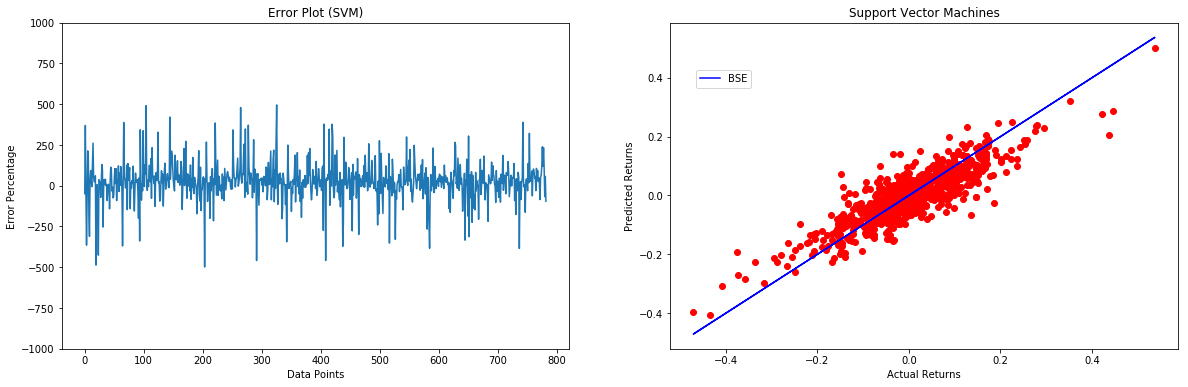

In [169]:
fig3, axes = plt.subplots(1,2,figsize =(20,6))

axes[0].plot(range(0,len(error3)),error3)
axes[1].plot(y_test,predict3,'ro')
axes[1].plot(y_test,y_test,'b')

axes[0].set_ylim(-1000,1000)
axes[0].set_ylabel('Error Percentage')
axes[0].set_xlabel('Data Points')
axes[0].set_title('Error Plot (SVM)')

axes[1].set_xlabel('Actual Returns')
axes[1].set_ylabel('Predicted Returns')
axes[1].set_title('Support Vector Machines')
axes[1].legend(loc = (0.05,0.8))

In [170]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

In [171]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [172]:
predict4 = dtree.predict(X_test)

In [173]:
error4 =[]; j=0;err=[];u4=[]
for i in y_test.index:
    if(y_test[i] != 0):
        err =((y_test[i]-predict4[j])/y_test[i])*100
        error4.append(err)
    j=j+1

In [174]:
print(np.mean(error4))

-999.2975172714115


In [175]:
(np.sqrt(metrics.mean_squared_error(y_test,predict4)))

0.07500474735224079

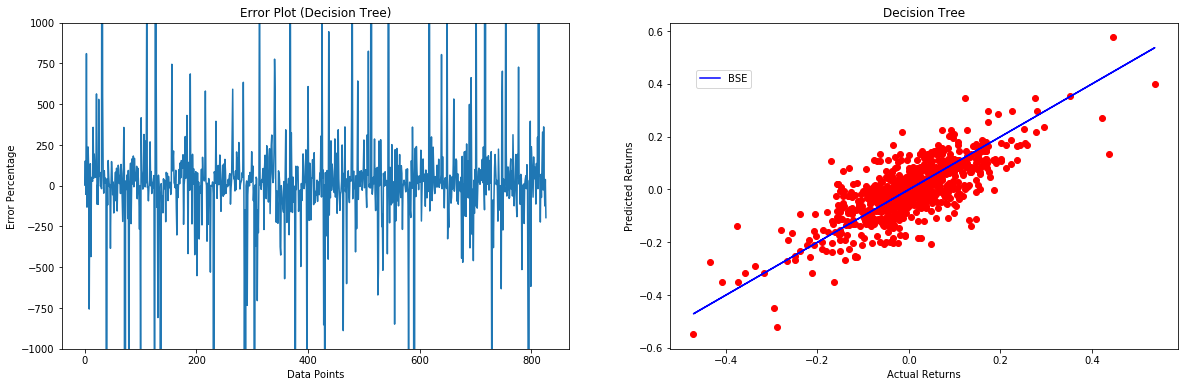

In [176]:
fig4, axes = plt.subplots(1,2,figsize =(20,6))

axes[0].plot(range(0,len(error4)),error4)
axes[1].plot(y_test,predict4,'ro')
axes[1].plot(y_test,y_test,'b')

axes[0].set_ylim(-1000,1000)
axes[0].set_ylabel('Error Percentage')
axes[0].set_xlabel('Data Points')
axes[0].set_title('Error Plot (Decision Tree)')

axes[1].set_xlabel('Actual Returns')
axes[1].set_ylabel('Predicted Returns')
axes[1].set_title('Decision Tree')
axes[1].legend(loc = (0.05,0.8))

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [36]:
rf.fit(X_train,y_train)

C:\Users\hrish\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [39]:
y_train

1082   -0.053842
1322    0.015334
1755    0.014266
799    -0.231948
354     0.088670
1180    0.005718
1379   -0.153053
63     -0.102526
1592   -0.038019
1203    0.075414
559     0.019304
1564   -0.016660
1833   -0.075598
1777    0.005887
286     0.200570
814     0.054805
1329    0.034893
661     0.015884
922     0.046844
1337    0.136622
1907   -0.024596
1965    0.043567
904    -0.082237
1200    0.100511
128    -0.373279
1829   -0.020045
182    -0.286697
233    -0.046274
1929   -0.291375
866     0.011261
          ...   
1662    0.012575
275    -0.095849
1273   -0.006271
1864    0.073130
1580   -0.147064
1442   -0.054561
59      0.165763
883     0.130148
1949   -0.137323
371     0.084996
136    -0.067380
1530    0.234412
623    -0.063370
1875    0.033693
49     -0.023005
477    -0.287028
908    -0.011766
1728    0.029346
732     0.050672
936     0.037666
1668    0.078607
1576   -0.010454
973     0.083225
75     -0.012994
2045    0.049378
599     0.060361
1599   -0.044758
1361   -0.2390

In [45]:
error =[]; j=0;err=[];u=[]
for i in y_train.index:
    if(y_train[i] != 0):
        err =((y_train[i]-rf.predict(X_train)[j])/y_train[i])*100
        error.append(err)
    j=j+1

In [54]:
len(y_train)

1240

(-500, 500)

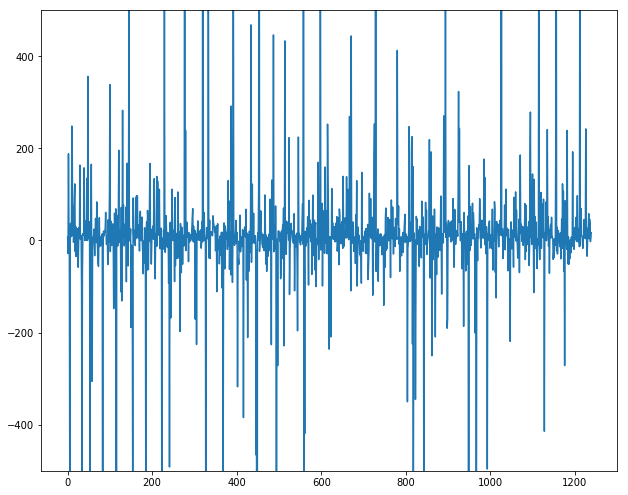

In [49]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(range(0,len(error)),error)
ax.set_ylim(-500,500)

In [179]:
predict5 = rf.predict(X_test)

In [180]:
error5 =[]; j=0;err=[];u5=[]
for i in y_test.index:
    if(y_test[i] != 0):
        err =((y_test[i]-predict5[j])/y_test[i])*100
        error5.append(err)
    j=j+1

In [181]:
print(np.mean(error5))

-834.9479655139344


In [182]:
(np.sqrt(metrics.mean_squared_error(y_test,predict5)))

0.05869887131596481

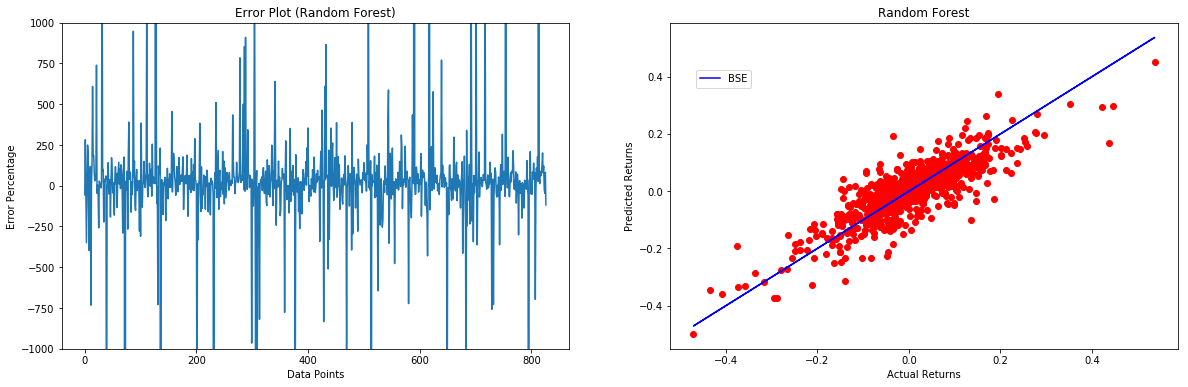

In [183]:
fig5, axes = plt.subplots(1,2,figsize =(20,6))

axes[0].plot(range(0,len(error5)),error5)
axes[1].plot(y_test,predict5,'ro')
axes[1].plot(y_test,y_test,'b')

axes[0].set_ylim(-1000,1000)
axes[0].set_ylabel('Error Percentage')
axes[0].set_xlabel('Data Points')
axes[0].set_title('Error Plot (Random Forest)')

axes[1].set_xlabel('Actual Returns')
axes[1].set_ylabel('Predicted Returns')
axes[1].set_title('Random Forest')
axes[1].legend(loc = (0.05,0.8))

In [184]:
RMSE = []
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,predict1)))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,predict2)))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,predict3)))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,predict4)))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,predict5)))
RMSE.append(0.05584388628426986)
RMSE

[0.05408925582422604,
 0.06092853579768795,
 0.05380495219623447,
 0.07500474735224079,
 0.05869887131596481,
 0.05584388628426986]

In [298]:
RMSE = pd.DataFrame(RMSE, index = ['Linear Regression','K Neighbors','Support Vector Machines','Decision Tree',"Random Forest",'Deep Neural Networks'], columns=['RMSE Values'])
RMSE

,RMSE Values
Linear Regression,0.052403
K Neighbors,0.063747
Support Vector Machines,0.052004
Decision Tree,0.075821
Random Forest,0.058242
Deep Neural Networks,0.055844


Text(0.5, 1.0, 'Root Mean Squared Errors')

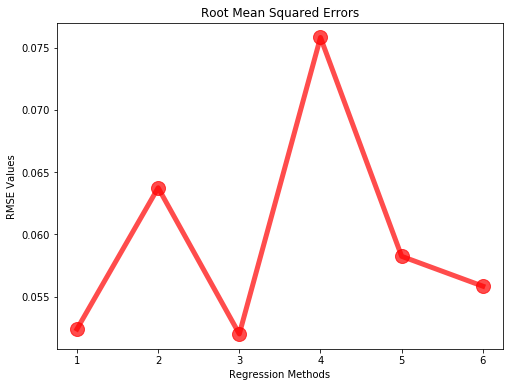

In [303]:
fig, axes = plt.subplots(1,1,figsize = (8,6))

axes.plot(range(1,7), RMSE, color = 'r' , linewidth = 5,linestyle='-', marker = 'o',markersize =14,alpha =0.7)
axes.set_ylabel('RMSE Values')
axes.set_xlabel('Regression Methods')
axes.set_title('Root Mean Squared Errors')

In [225]:
print(u1,'\n')
print(u2,'\n')
print(u3,'\n')
print(u4,'\n')
print(u5)

[1418, 1413, 1836, 1120, 1218, 1669, 1388, 1677, 1042, 1188, 1137, 1495] 

[1545, 1418, 0, 1413, 1836, 1120, 1423, 1947, 1018, 135, 1218, 1669, 986, 1066, 1388, 801, 1060, 653, 1677, 127, 1343, 1137, 1621, 1495] 

[501, 1545, 1418, 1632, 0, 1413, 1836, 1120, 1554, 1018, 135, 1218, 1669, 1546, 1480, 1388, 1060, 1677, 1042, 127, 1188, 1817, 1137, 1495] 

[501, 1086, 1545, 1810, 1380, 1632, 1413, 978, 1836, 355, 1503, 753, 759, 679, 1423, 1824, 146, 700, 1211, 1282, 1947, 132, 1018, 135, 949, 1218, 1669, 1870, 1298, 1066, 1480, 1388, 1816, 298, 1665, 801, 1060, 653, 1677, 834, 1499, 1042, 370, 127, 628, 1188, 1137, 1621, 1495, 103] 

[1418, 1632, 1836, 1829, 1423, 1824, 1947, 1018, 135, 1218, 1669, 1870, 1298, 1480, 1388, 298, 801, 1060, 1677, 834, 1795, 127, 1188, 1137, 1495]


In [99]:
#d.drop([1660, 730, 1566, 545, 1151, 735, 1120, 242, 1676, 584, 1360, 373, 303, 509, 414, 1210, 1613, 780, 1504, 1329, 1529, 1560, 931, 529, 1877],axis=0,inplace=True)

In [100]:
d.shape

(1996, 5)

In [168]:
#d.drop([762, 1491, 1092, 1958, 1055, 1608, 1484, 1227, 1204, 1073, 1628, 1026, 922, 1562],inplace=True)

In [228]:
#d.drop([1418, 1413, 1836, 1947, 1018, 135, 1218, 1388, 1677, 1137, 1495, 1188, 1169, 1060, 127],inplace=True)
d.shape

(1967, 5)

In [229]:
d.to_csv('DFM Fitted values.csv')